In [56]:
import numpy as np
import math

import matplotlib.pyplot as plt

from scipy.stats import linregress

We observed that the amplitude that we calculated referring to the paper gave us inadequate values. 

We wanted to find the true amplitude by investigating the amplified probability when the wrong amplitude was given.

Let the given amplitude be $a$, and the true amplitude to be $\alpha$ and the resulting probability to be $P(a,\alpha)$.

The code applies the oracle for $k = \lceil \frac{\pi}{4 \arcsin (a)} -\frac{1}{2} \rceil$ times. 

Also since it is an exact amplitude amplification, it adjusts amplitude by $\frac{\sin (\theta)}{a}$ where $\theta = \frac{\pi}{4k+2}$.

That makes the amplitude to be $\sin \varphi = \frac{\alpha \sin \theta}{a} $

To wrap up, when we put amplitude as $a$ in the exact amplitude amplification function, 

the amplified probability of the given state will be

\begin{align}
    P(a,\alpha) & = \sin^2 ( (2k+1) \varphi )\\
    & = \sin^2 [ (2k+1) \cdot \arcsin ( \frac{\alpha}{a} \sin \frac{\pi}{4k+2} )  ]
\end{align}


Plotting this function gives

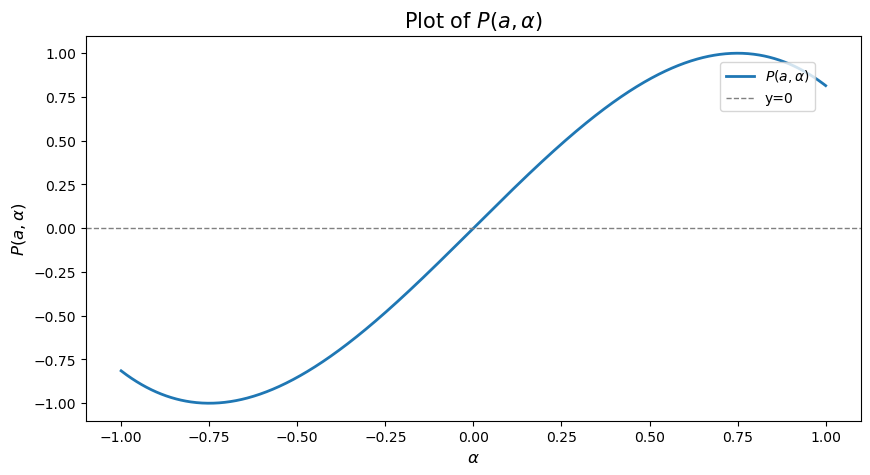

If we run the code for wrong amplitude, it will give some value $X$.

Solving $P(a,\alpha)-X=0$ for fixed $a$ will give at most two possible $X$.

Thus, solving this for several $a$ values and averaging the close ones gives the 

reasonable guess for the real amplitude, $\alpha$. (We deliberately used wrong $a$ as an input)

We applied Newton's method for solving this numerically.

(When we put several values of $a$ for the same setting, we can observe that it usually gave two answers

for the real amplitude. And one of the two values seems to be shown up for every cases and the other value

didn's showed such correlation. Thus, we could conclude that the recurring value for the different $a$ values

to be the exact amplitude and averaged them.)

The plot for the estimated amplitude and the calculated amplitude showed clear linear relation.

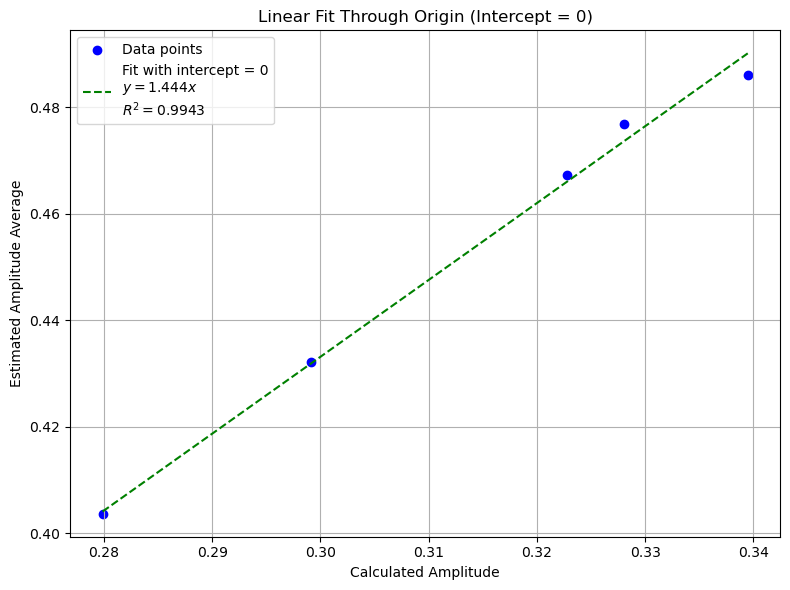

Therefore, we adjusted the calculation by multiplying 1.444 for the calculated value to get the 

adequate amplitdue for the exact amplitude amplification.

In [57]:
def find_k(a):
    k=math.ceil(np.pi/(4*np.arcsin(a)) -0.5)
    return k

def find_mismatch(a,alpha):
    k = find_k(a)
    theta=np.pi/(4*k+2)
    varphi=np.arcsin(alpha*np.sin(theta)/a)

    amplitude=np.sin((2*k+1)*varphi)
    return amplitude

In [58]:
# Step 2: Parameters
a = 0.75
X = np.sqrt(0.73497)  # target mismatch value
#X=0

In [59]:
# Function for P(x) and its derivative, denoted as f(x) and df(x) respectively

# function for computing P(x)
def f(x):
    return find_mismatch(a,x)-X

# function for computing P'(x). Since required precision is 1e-10, I used h=1e-12, which is smaller then the given precision.
def df(x):
    h=1e-6
    return (f(x+h)-f(x-h))/(2*h)

In [60]:
# Newton's method
def newtonMethod(x):
    dx=f(x)/df(x)
    return x-dx

# Newtons' method solution starting from x0, with precision denoted as error
def findSol(x0,error):
    indicator=True

    while(indicator):
        x=newtonMethod(x0)
        condition1=abs(f(x)<error)
        condition2=abs(x-x0)<error
        x0=x
        indicator =not (condition1 and condition2)
    return x0

# Finding the roots by Newton's method for the given list of inital points. (Initial guess for the roots)
def roots_of_f(x0_List,error):
    roots=[]
    for i in range(len(x0_List)):
        solution=findSol(x0_List[i],error)
        roots.append(solution)
    return roots

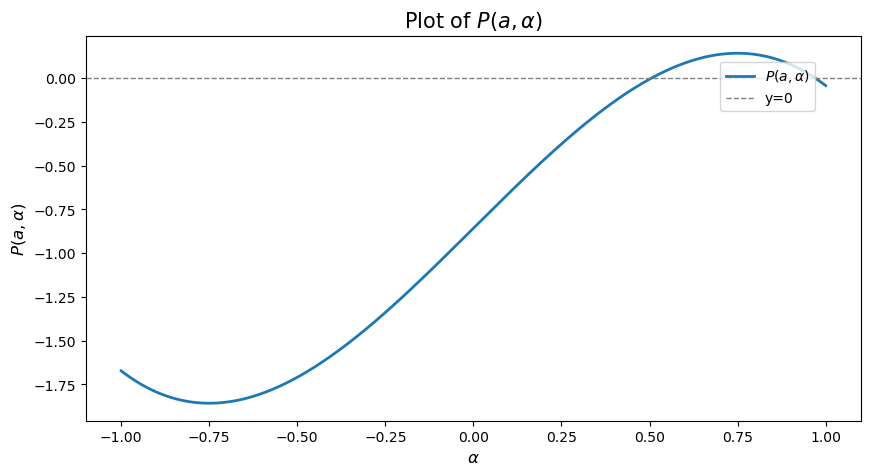

In [61]:
# 1-1) Plotting the P(x)

# The plot shows that the good guess for the roots are

# 0.04, 0.15, 0.37, 0.61, 0.83, 0.95

# Create x values from 0 to 1
x = np.linspace(-1, 1, 1000)
y = f(x)

# Plot f(x)
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='$P(a,\\alpha)$', linewidth=2)

# Add horizontal line at y=0
plt.axhline(0, color='gray', linestyle='--', linewidth=1, label='y=0')

# Labels and title
plt.title('Plot of $P(a, \\alpha)$', fontsize=15)
plt.xlabel('$\\alpha$',fontsize=12)
plt.ylabel('$P(a, \\alpha)$',fontsize=12)
#plt.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(0.95, 0.95))

# Show the plot
plt.show()

In [62]:
# 1-2) Finding the roots of P(x)=0 for x=0 to x=1. The initial guessing points are from 1-1)
x_i=[0.0,0.9]
error=1e-10

roots=np.array(roots_of_f(x_i,error))
print("Roots from Newton's Method")
print(roots)
print()
print("Function values for calcualted roots.")
print("They are very close to 0.")
print(f(roots))

Roots from Newton's Method
[0.50494613 0.97074893]

Function values for calcualted roots.
They are very close to 0.
[ 0.00000000e+00 -1.11022302e-16]


Followings are the data for estimated/calculated value of amplitude for varying range with $\text{EXP}\_\text{RATE} = 1 $

Linear Regression shows good fitting ($R^2 >0.99$)

If we allow intercept, we get slope of $1.428$

If we don't we get $1.444$

Since their $R^2$ value had only $0.0001$ difference, we used

linear fitting without intercept.

We originally suspected missing factor of $\sqrt{2}$ but as we put more data, it became $1.444$, far from $\sqrt{2}$

In [63]:
# Step 1: Input data
calculated = np.array([0.2798699195, 0.3227396325, 0.3394745017, 0.3280870938, 0.2991333939])
estimated = np.array([0.4036581867, 0.46719464, 0.48612144, 0.4767588633, 0.43207591])

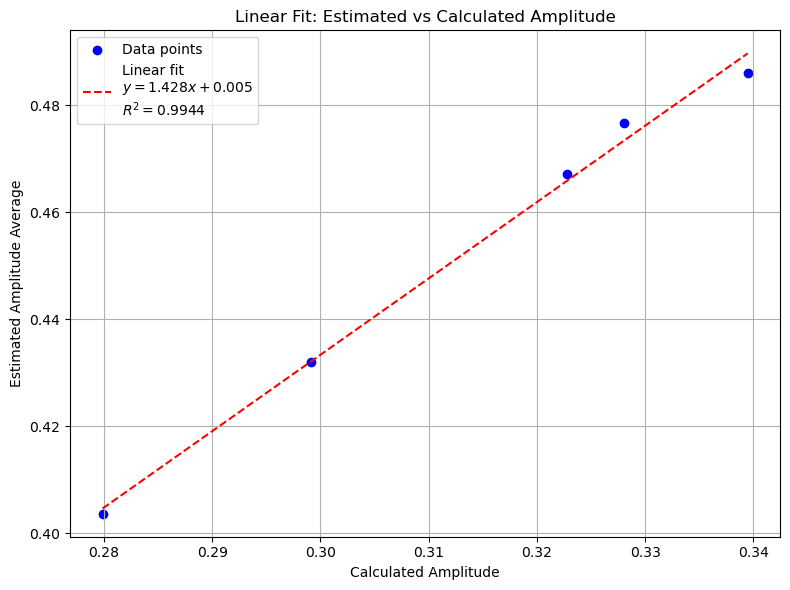

In [64]:
# Step 2: Linear regression
slope, intercept, r_value, p_value, std_err = linregress(calculated, estimated)
line_x = np.linspace(min(calculated), max(calculated), 100)
line_y = slope * line_x + intercept

# Step 3: Plot
plt.figure(figsize=(8,6))
plt.scatter(calculated, estimated, color='blue', label='Data points')
plt.plot(line_x, line_y, color='red', linestyle='--', label=f'Linear fit\n$y={slope:.3f}x + {intercept:.3f}$\n$R^2={r_value**2:.4f}$')
plt.xlabel('Calculated Amplitude')
plt.ylabel('Estimated Amplitude Average')
plt.title('Linear Fit: Estimated vs Calculated Amplitude')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [65]:
def r_squared_given_slope(x, y, fixed_slope):
    """
    Calculates R^2 for the best-fit line y = fixed_slope * x + intercept,
    where the slope is fixed and intercept is optimized.
    """
    # Step 1: Compute optimal intercept for fixed slope
    intercept = np.mean(y - fixed_slope * x)

    # Step 2: Predict y using this line
    y_pred = fixed_slope * x + intercept

    # Step 3: Compute R^2
    ss_res = np.sum((y - y_pred) ** 2)  # Residual sum of squares
    ss_tot = np.sum((y - np.mean(y)) ** 2)  # Total sum of squares
    r_squared = 1 - (ss_res / ss_tot)

    return r_squared, intercept

# Example: Evaluate R^2 for a fixed slope (e.g., 1.3)
fixed_slope = np.sqrt(2)
r2, optimal_intercept = r_squared_given_slope(calculated, estimated, fixed_slope)

print(f"Fixed slope: {fixed_slope}")
print(f"Optimal intercept: {optimal_intercept:.6f}")
print(f"R^2 value: {r2:.6f}")


Fixed slope: 1.4142135623730951
Optimal intercept: 0.009295
R^2 value: 0.994288


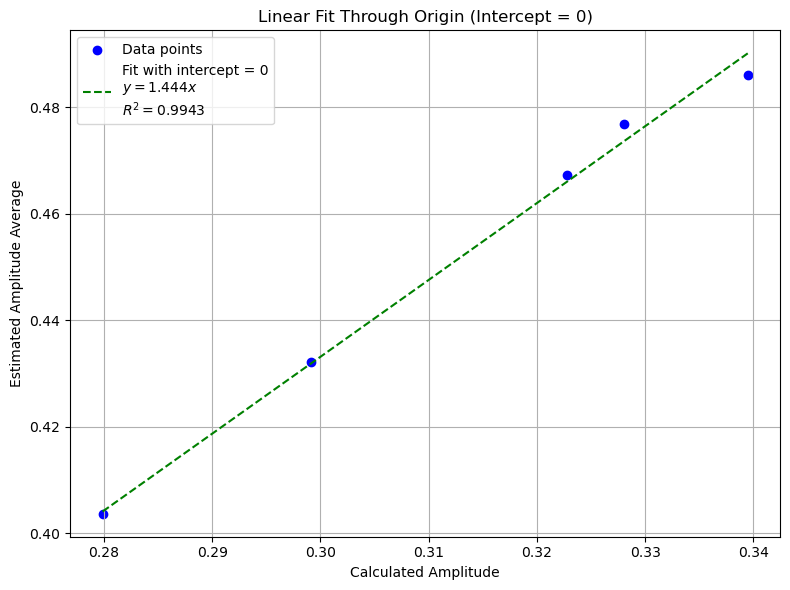

In [66]:
# Step 1: Input data
calculated = np.array([0.2798699195, 0.3227396325, 0.3394745017, 0.3280870938, 0.2991333939])
estimated = np.array([0.4036581867, 0.46719464, 0.48612144, 0.4767588633, 0.43207591])

# Step 2: Linear regression with intercept = 0
slope_0 = np.sum(calculated * estimated) / np.sum(calculated ** 2)
y_pred_0 = slope_0 * calculated
ss_res_0 = np.sum((estimated - y_pred_0) ** 2)
ss_tot = np.sum((estimated - np.mean(estimated)) ** 2)
r2_0 = 1 - ss_res_0 / ss_tot

# Step 3: Plot
line_x = np.linspace(min(calculated), max(calculated), 100)
line_y = slope_0 * line_x

plt.figure(figsize=(8,6))
plt.scatter(calculated, estimated, color='blue', label='Data points')
plt.plot(line_x, line_y, color='green', linestyle='--',
         label=f'Fit with intercept = 0\n$y = {slope_0:.3f}x$\n$R^2 = {r2_0:.4f}$')
plt.xlabel('Calculated Amplitude')
plt.ylabel('Estimated Amplitude Average')
plt.title('Linear Fit Through Origin (Intercept = 0)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [67]:
def r_squared_fixed_slope_intercept_zero(x, y, fixed_slope):
    """
    Calculates R^2 for the line y = fixed_slope * x,
    where slope is fixed and intercept is 0.
    """
    # Step 1: Predict y using fixed slope and intercept = 0
    y_pred = fixed_slope * x

    # Step 2: Compute R^2
    ss_res = np.sum((y - y_pred) ** 2)  # Residual sum of squares
    ss_tot = np.sum((y - np.mean(y)) ** 2)  # Total sum of squares
    r_squared = 1 - (ss_res / ss_tot)

    return r_squared


fixed_slope = np.sqrt(2)  # Example slope

r2 = r_squared_fixed_slope_intercept_zero(calculated, estimated, fixed_slope)
print(f"R² for slope = {fixed_slope}, intercept = 0: {r2:.6f}")

R² for slope = 1.4142135623730951, intercept = 0: 0.903053
